In [17]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# To plot pretty figures
#%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "src_images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def get_path(fig_name, fig_extension="pdf"):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    return path


# Quantum implementation of classical logic gates

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [19]:
def not_gate(input_str):
    """ NOT gate.

    Parameters
        input_str (str): Input, encoded in qubit 0.

    Returns:
        QuantumCircuit: Output NOT circuit.
    """
    qc = QuantumCircuit(1)
    if input_str == '1':
        qc.x(0)
    qc.barrier()
    qc.x(0)
    return qc

In [20]:
def xor_gate(input_a, input_b):
    """ XOR gate.

    Parameters
        input_a (str): Input, encoded in qubit 0.
        input_b (str): Input, encoded in qubit 1.

    Returns:
        QuantumCircuit: Output XOR circuit
    """
    qc = QuantumCircuit(2)
    if input_a == '1':
        qc.x(0)
    if input_b == '1':
        qc.x(1)
    qc.barrier()
    qc.cx(0,1)
    return qc

In [21]:
def and_gate(input_a, input_b):
    qc = QuantumCircuit(3)
    if input_a == '1':
        qc.x(0)
    if input_b == '1':
        qc.x(1)
    qc.barrier()
    qc.ccx(0,1,2)
    return qc

In [22]:
def nand_gate(input_a, input_b):
    qc = QuantumCircuit(3)
    if input_a == '1':
        qc.x(0)
    if input_b == '1':
        qc.x(1)
    qc.barrier()
    qc.ccx(0,1,2)
    qc.x(2)
    return qc

In [23]:
def or_gate(input_a, input_b):
    qc = QuantumCircuit(3)
    if input_a == '1':
        qc.x(0)
    if input_b == '1':
        qc.x(1)
    qc.x(0)
    qc.x(1)
    qc.barrier()
    qc.ccx(0,1,2)
    qc.x(2)
    return qc

In [24]:
def measure(qc):
    qc.measure_all()

    # Transpile for simulator
    simulator = AerSimulator()
    qc = transpile(qc, simulator)
    
    # Run and get counts
    result = simulator.run(qc, shots=1, memory=True).result()
    memory = result.get_memory(qc)
    return memory

NOT with input 0 gives output ['1']


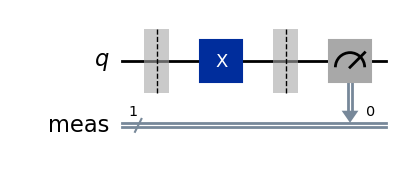



NOT with input 1 gives output ['0']


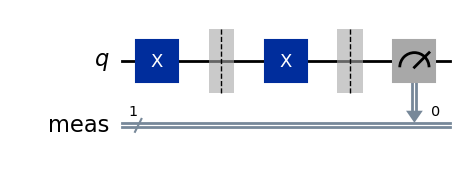

In [25]:
## Test NOT GATE
for inp in ['0', '1']:
    qc = not_gate(inp)
    out = measure(qc)
    print(f"NOT with input {inp} gives output {out}")
    fig = qc.draw(output = 'mpl')
    out_name = f"not_gate_{inp}"
    fig.savefig(
        get_path(out_name),
        bbox_inches='tight',
        pad_inches=0)
    display(fig)
    print('\n')

XOR with input 0 0 gives output 0


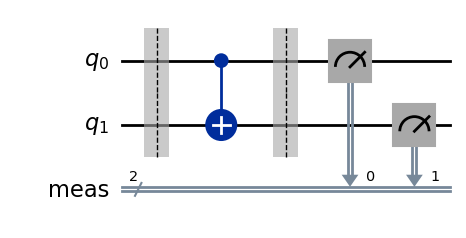



XOR with input 0 1 gives output 1


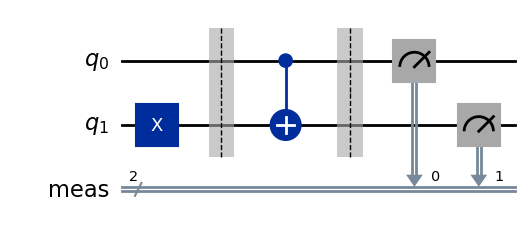



XOR with input 1 0 gives output 1


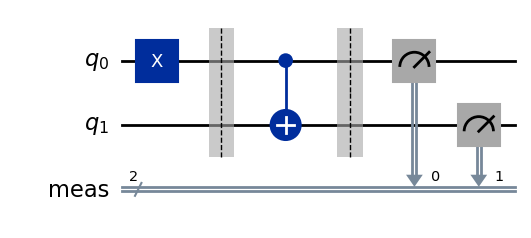



XOR with input 1 1 gives output 0


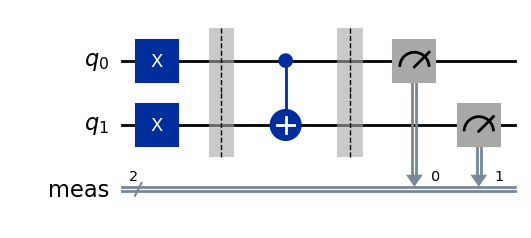

In [27]:
## Test XOR Gate
for inpa in ['0', '1']:
    for inpb in ['0', '1']:
        qc = xor_gate(inpa,inpb)
        out = measure(qc)
        print(f"XOR with input {inpa} {inpb} gives output {out[0][0]}")
        fig = qc.draw(output = 'mpl')
        out_name = f"xor_gate_{inpa}_{inpb}"
        fig.savefig(
            get_path(out_name),
            bbox_inches='tight',
            pad_inches=0)
        display(fig)
        print('\n')

AND with input 0 0 gives output 0


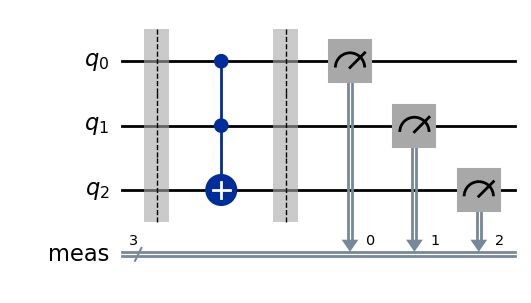



AND with input 0 1 gives output 0


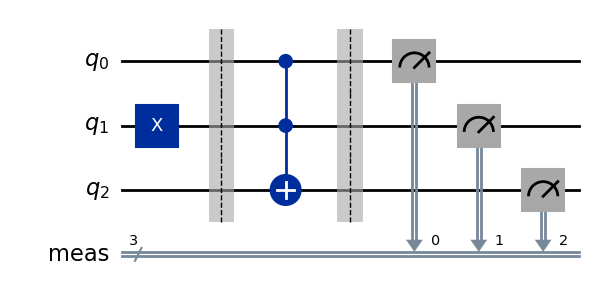



AND with input 1 0 gives output 0


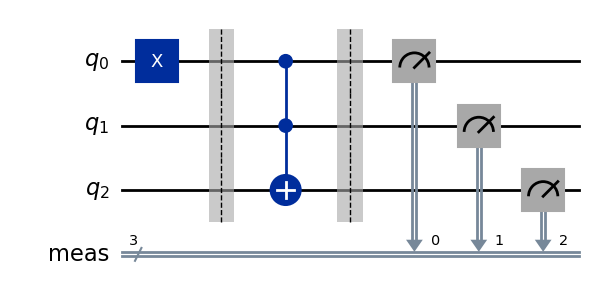



AND with input 1 1 gives output 1


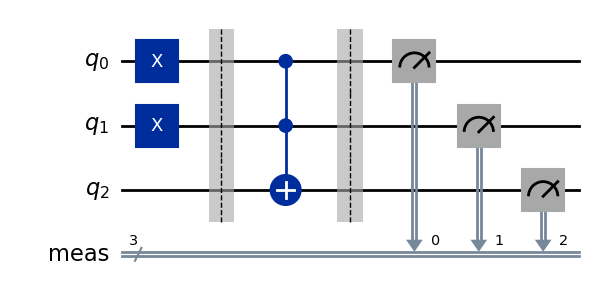

In [28]:
## Test AND Gate
for inpa in ['0', '1']:
    for inpb in ['0', '1']:
        qc = and_gate(inpa,inpb)
        out = measure(qc)
        print(f"AND with input {inpa} {inpb} gives output {out[0][0]}")
        fig = qc.draw(output = 'mpl')
        out_name = f"and_gate_{inpa}_{inpb}"
        fig.savefig(
            get_path(out_name),
            bbox_inches='tight',
            pad_inches=0)
        display(fig)
        print('\n')

NAND with input 0 0 gives output 1


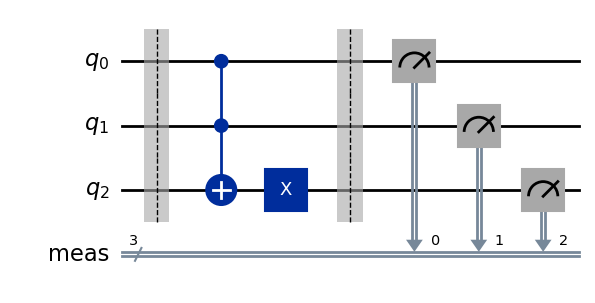



NAND with input 0 1 gives output 1


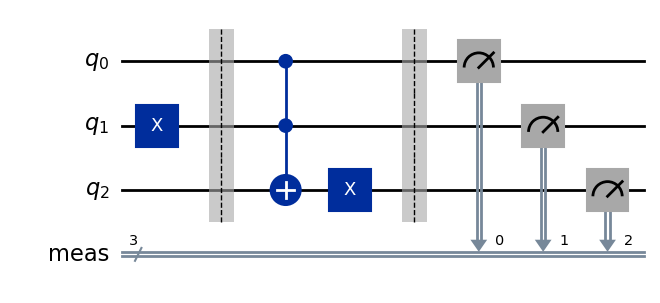



NAND with input 1 0 gives output 1


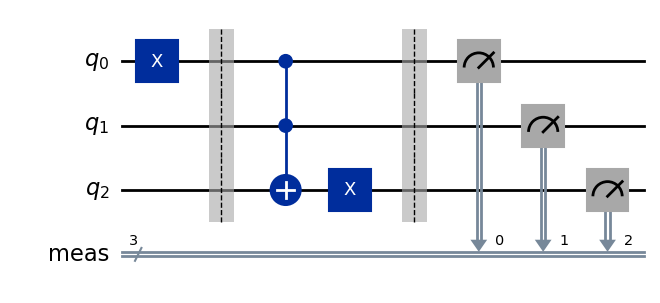



NAND with input 1 1 gives output 0


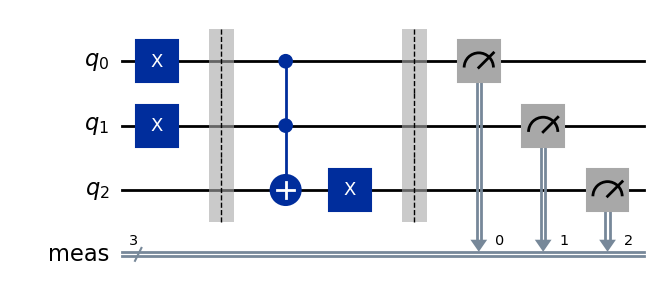

In [12]:
## Test NAND Gate
for inpa in ['0', '1']:
    for inpb in ['0', '1']:
        qc = nand_gate(inpa,inpb)
        out = measure(qc)
        print(f"NAND with input {inpa} {inpb} gives output {out[0][0]}")
        fig = qc.draw(output = 'mpl')
        # out_name = f"not_gate_{inp}"
        # fig.savefig(
        #     get_path(out_name),
        #     bbox_inches='tight',
        #     pad_inches=0)
        display(fig)
        print('\n')

OR with input 0 0 gives output 0


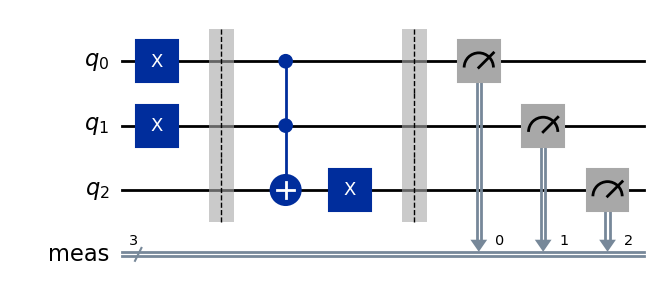



OR with input 0 1 gives output 1


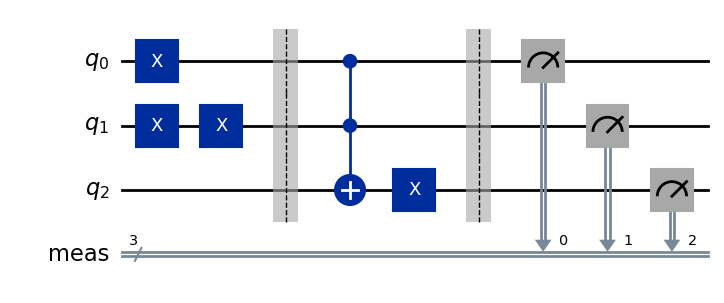



OR with input 1 0 gives output 1


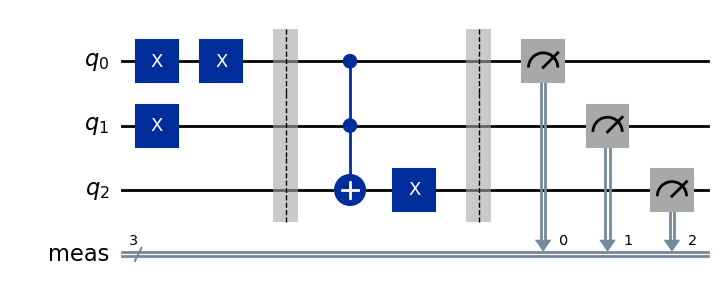



OR with input 1 1 gives output 1


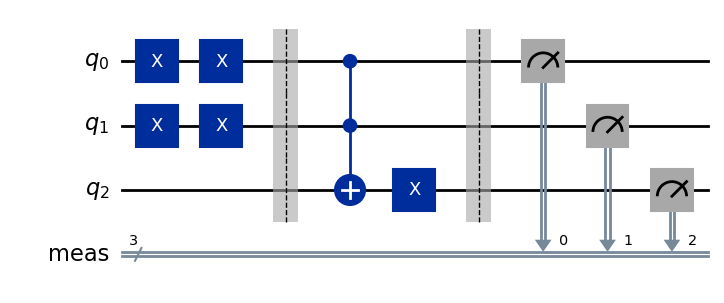

In [13]:
## Test NAND Gate
for inpa in ['0', '1']:
    for inpb in ['0', '1']:
        qc = or_gate(inpa,inpb)
        out = measure(qc)
        print(f"OR with input {inpa} {inpb} gives output {out[0][0]}")
        fig = qc.draw(output = 'mpl')
        # out_name = f"not_gate_{inp}"
        # fig.savefig(
        #     get_path(out_name),
        #     bbox_inches='tight',
        #     pad_inches=0)
        display(fig)
        print('\n')

# Quantum Adder

In [14]:
qc = QuantumCircuit(4,2)
qc.x(0)
qc.x(1)
#encode inputs in qubit 0 and 1
qc.barrier()
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()
qc.measure(2,0)
qc.measure(3,0)


In [15]:
import matplotlib.pyplot as plt



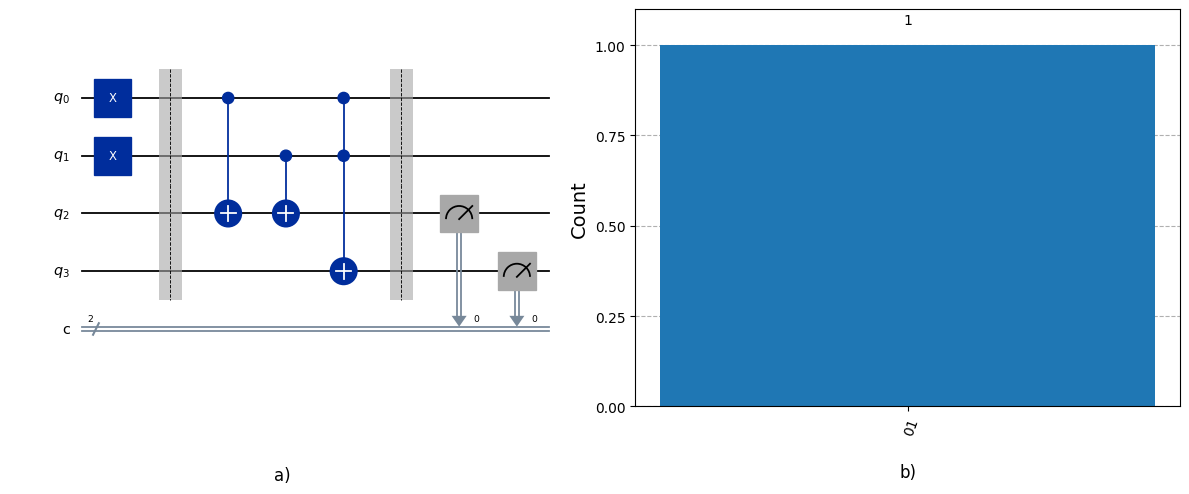

In [16]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots=1, memory=True).result()
counts = result.get_counts(qc)

# Create a single figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Draw the circuit directly in subplot (a)
qc.draw(output="mpl", ax=axes[0])
axes[0].set_title("a)", y=-0.4)

# Plot histogram in subplot (b)
plot_histogram(counts, ax=axes[1])
axes[1].set_title("b)", y=-0.2)

plt.tight_layout()
plt.savefig(get_path("half_adder_both"), bbox_inches="tight", pad_inches=0)
plt.show()